Pca to technika redukcji wymiarowości. Jej głównym celem jest zmniejszenie liczby cech (wymiarów) w zbiorze danych przy jednoczesnym zachowaniu jak największej ilości istotnych informacji. PCA szuka najważniejszych kierunków w twoich danych, wzdłuż których dane są najbardziej rozciągają. Najważniejsze kierunki nazywają się głownymi składnikami (principal components).


W analizie głównych składowych (PCA) głównym celem jest znalezienie nowych, nieskorelowanych zmiennych (głównych składowych), które "wychwytują" jak najwięcej zmienności (czyli wariancji) z oryginalnych danych.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Wczytanie danych
data = load_breast_cancer()

# Tworzymy DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())

# 1. Standaryzacja danych (odjęcie średniej, podzielenie przez odchylenie standardowe)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 2. Obliczenie macierzy kowariancji
cov_matrix = np.cov(X_scaled.T)
print("Macierz kowariancji: \n", cov_matrix)
#macierz kowariancji mówi nam o tym, jak zmienne są ze sobą skorelowane. Wartości bliskie 0 oznaczają brak korelacji,
# a wartości bliskie 1 lub -1 oznaczają silną korelację.

# 3. Obliczenie wartości i wektorów własnych
eigvals, eigvecs = np.linalg.eig(cov_matrix)
#wektory własne macierze kowiariancji - oczyszczone cechy z wpływów innych cech
#wartości własne - informują nas o tym, jak ważne są poszczególne cechy w kontekście analizy PCA


# 4. Interpretacja
print("Wartości własne: \n", eigvals)
print("Wektory własne: \n", eigvecs)
#


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

es


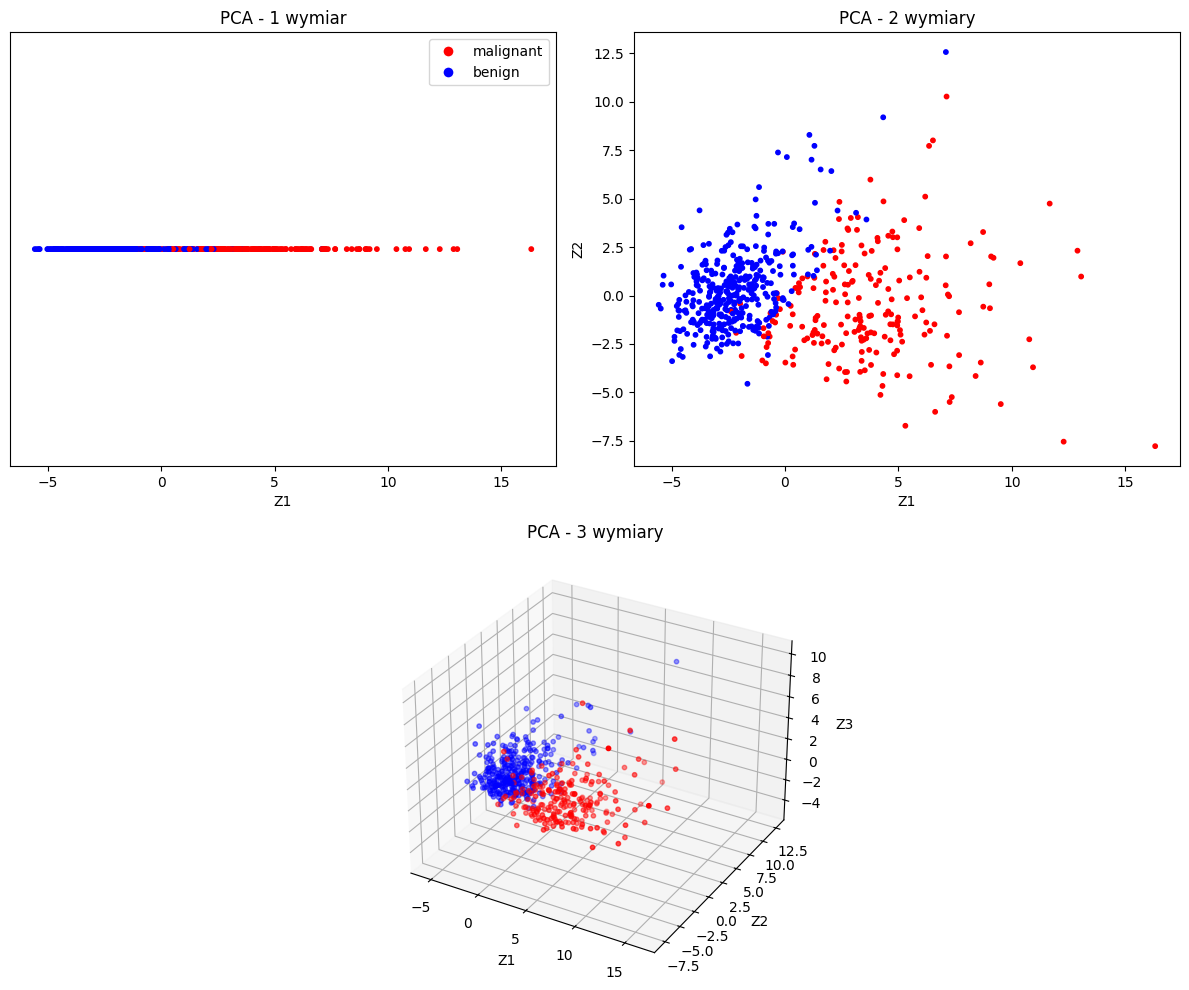

In [41]:


# 5(4). Przekształcenie danych
# Sortujemy wartości własne i wybieramy te, które są największe
sorted_indices = np.argsort(eigvals)[::-1]  # Indeksy w porządku malejącym
#argsort - zwraca indeksy posortowanych wartości
eigvals_sorted = eigvals[sorted_indices]
#sortujemy wartości własne w porządku malejącym
eigvecs_sorted = eigvecs[:, sorted_indices]
#sortujemy wektory własne w porządku malejącym

Z1 = X_scaled @ eigvecs_sorted[:, :1]  # macierz m x 1
# W celu przekształcenia danych z X do Z używamy macierzy wektorów własnych
# Z1 to przekształcone dane w 1 wymiarze


# Redukcja do 2D
Z2 = X_scaled @ eigvecs_sorted[:, :2]  # macierz m x 2

# Redukcja do 3D
Z3 = X_scaled @ eigvecs_sorted[:, :3]  # macierz m x 3

# Wykresy porównawcze 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Kolory klas
colors = ['red' if i == 0 else 'blue' for i in data.target]
labels = data.target_names

plt.figure(figsize=(12, 10))

# Wykres 1D
plt.subplot(2, 2, 1)
plt.title("PCA - 1 wymiar")
plt.scatter(Z1[:, 0], np.zeros_like(Z1), c=colors, s=10)
plt.xlabel("Z1")
plt.yticks([])
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label=labels[0], markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label=labels[1], markerfacecolor='blue', markersize=8)
])

# Wykres 2D
plt.subplot(2, 2, 2)
plt.title("PCA - 2 wymiary")
plt.scatter(Z2[:, 0], Z2[:, 1], c=colors, s=10)
plt.xlabel("Z1")
plt.ylabel("Z2")

# Wykres 3D
ax = plt.subplot(2, 1, 2, projection='3d')
ax.set_title("PCA - 3 wymiary")
ax.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], c=colors, s=10)
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")

plt.tight_layout()
plt.show()

In [42]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# --- 10.4: Principal Components Analysis (USArrests Data) ---


In [43]:



# Wczytanie danych 
df = pd.read_csv('USArrests.csv', index_col=0)
print("\nFirst 5 rows of USArrests data:")
print(df.head())

# Get information about the columns
print("\nInfo about USArrests data columns:")
df.info()



First 5 rows of USArrests data:
            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Info about USArrests data columns:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


cos tam 


In [44]:

# Examine column means
print("\nColumn means of USArrests data:")
print(df.mean())

# Examine column variances
print("\nColumn variances of USArrests data:")
print(df.var())

# Scale the variables
# we scale because the variables are on different scales
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
print("\nFirst 5 rows of scaled USArrests data:")
print(X.head())




Column means of USArrests data:
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Column variances of USArrests data:
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

First 5 rows of scaled USArrests data:
              Murder   Assault  UrbanPop      Rape
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814


In [45]:
 # Fit the PCA model and transform X to get the principal components
pca = PCA() # Initialize PCA
pca_loadings = pd.DataFrame(pca.fit(X).components_.T,
                            index=df.columns,
                            columns=[f'V{i+1}' for i in range(pca.n_components_)])
print("\nPCA Loading Vectors (first 4 components):")
print(pca_loadings)


# Get the principal component scores
df_plot = pd.DataFrame(pca.fit_transform(X),
                       columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                       index=X.index)
print("\nFirst 5 rows of Principal Component Scores:")
print(df_plot.head())



PCA Loading Vectors (first 4 components):
                V1        V2        V3        V4
Murder    0.535899 -0.418181 -0.341233 -0.649228
Assault   0.583184 -0.187986 -0.268148  0.743407
UrbanPop  0.278191  0.872806 -0.378016 -0.133878
Rape      0.543432  0.167319  0.817778 -0.089024

First 5 rows of Principal Component Scores:
                 PC1       PC2       PC3       PC4
Alabama     0.985566 -1.133392 -0.444269 -0.156267
Alaska      1.950138 -1.073213  2.040003  0.438583
Arizona     1.763164  0.745957  0.054781  0.834653
Arkansas   -0.141420 -1.119797  0.114574  0.182811
California  2.523980  1.542934  0.598557  0.341996


C:\Users\kamil\AppData\Local\Temp\ipykernel_23188\72680712.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, -pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\kamil\AppData\Local\Temp\ipykernel_23188\72680712.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, -pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\kamil\AppData\Local\Temp\ipykernel_23188\72680712.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

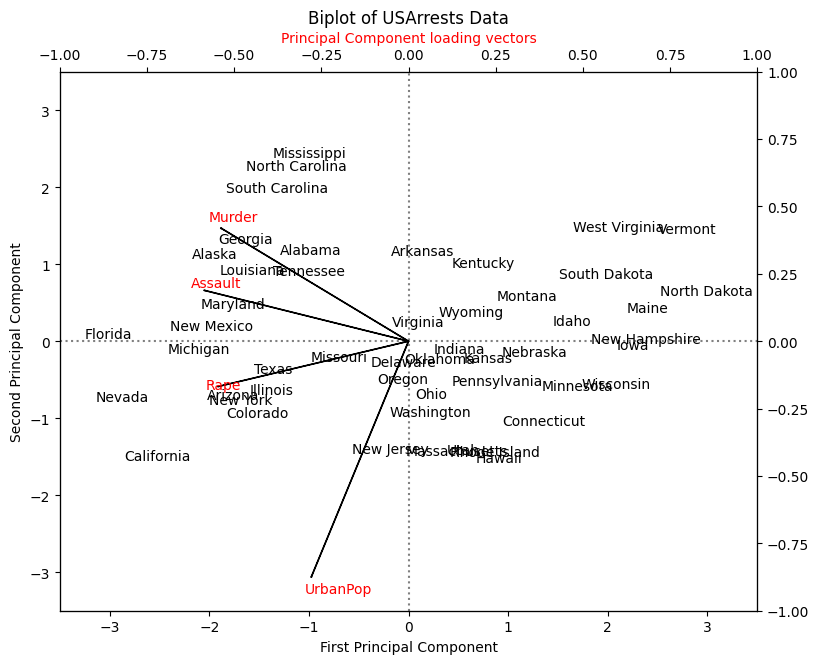


Explained variance by each principal component:
[2.53085875 1.00996444 0.36383998 0.17696948]

Proportion of variance explained by each principal component:
[0.62006039 0.24744129 0.0891408  0.04335752]


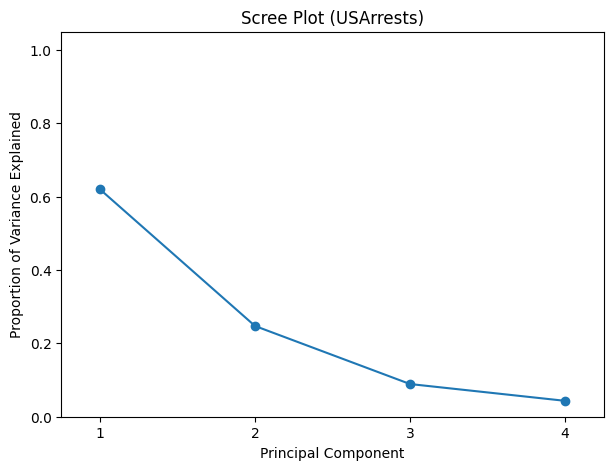

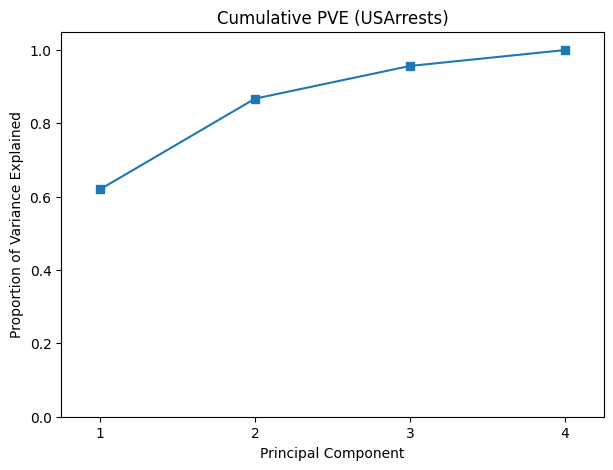

In [46]:

# Construct a biplot of the first two principal components
fig, ax1 = plt.subplots(figsize=(9, 7))
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

# Plot Principal Components 1 and 2 (states)
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i] * a, -pca_loadings.V2.loc[i] * a), color='red')

# Plot vectors
ax2.arrow(0, 0, -pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0, 0, -pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0, 0, -pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0, 0, -pca_loadings.V1[3], -pca_loadings.V2[3])
plt.title('Biplot of USArrests Data')
plt.show()


# Explained variance
print("\nExplained variance by each principal component:")
print(pca.explained_variance_)

# Proportion of variance explained
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)

# Plot PVE explained by each component
plt.figure(figsize=(7, 5))
plt.plot([1, 2, 3, 4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])
plt.title('Scree Plot (USArrests)')
plt.show()

# Plot cumulative PVE
plt.figure(figsize=(7, 5))
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4])
plt.title('Cumulative PVE (USArrests)')
plt.show()



1 wyres
Czarne wektory to wektory ładunków (loadings). Pokazują, jak silnie i w jakim kierunku każda oryginalna zmienna (np. "Murder") wpływa na położenie stanów na osiach głównych składowych (PC1 i PC2


2 wykres 
Scree Plot (USArrests): Pokazuje, jaka proporcja wariancji jest wyjaśniana przez każdą kolejną główną składową. Wskazuje, że pierwsza i druga składowa wyjaśniają zdecydowanie najwięcej.

3 wykres 
Prezentuje skumulowaną proporcję wariancji wyjaśnianą przez narastającą liczbę głównych składowych. Mówi nam, że już dwie pierwsze składowe wyjaśniają blisko 90% całej wariancji w danych.



--- NCI60 Data Analysis ---

Info about NCI60 data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB

First 5 rows of NCI60 labels:
     type
0     CNS
1     CNS
2     CNS
3   RENAL
4  BREAST

Shape of scaled NCI60 data: (64, 6830)

First 5 rows of NCI60 Principal Component Scores:
          0         1          2          3          4          5          6   \
0  19.838042 -3.555636  -9.812399  -0.824246 -12.609984   7.471505  14.190730   
1  23.089215 -6.441460 -13.478251   5.635308  -8.035496   3.715178  10.143225   
2  27.456114 -2.465143  -3.533054  -1.341673 -12.564846  17.344925  10.354857   
3  42.816801  9.768358  -0.890073   3.445043 -42.269904  27.238815  17.520642   
4  55.418530  5.198897 -21.094558  15.849712 -10.443273  12.991051  12.597895   

          7          8          9   ...        54         55        56  \
0   3.197977 -21.938350 -20.369363  ... -3.571612 

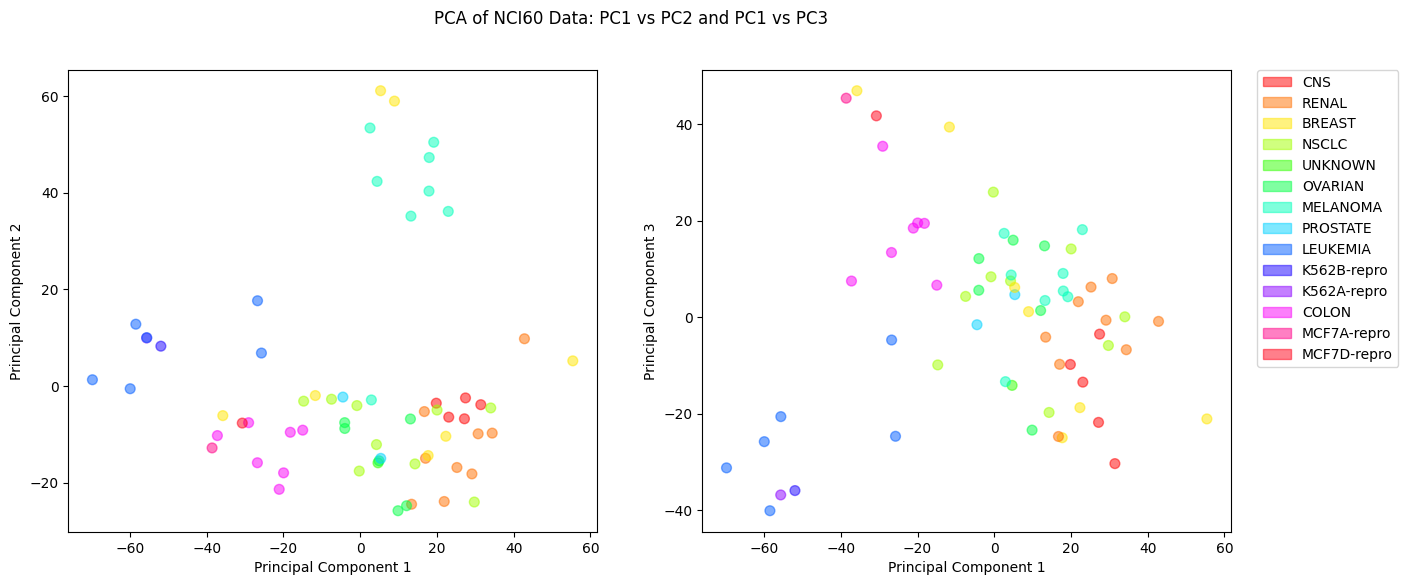


Summary of first 5 Principal Components for NCI60 data:
                              PC1        PC2        PC3        PC4        PC5
Standard Deviation      27.853469  21.481355  19.820465  17.032556  15.971807
Proportion of Variance   0.113589   0.067562   0.057518   0.042476   0.037350
Cumulative Proportion    0.113589   0.181151   0.238670   0.281145   0.318495


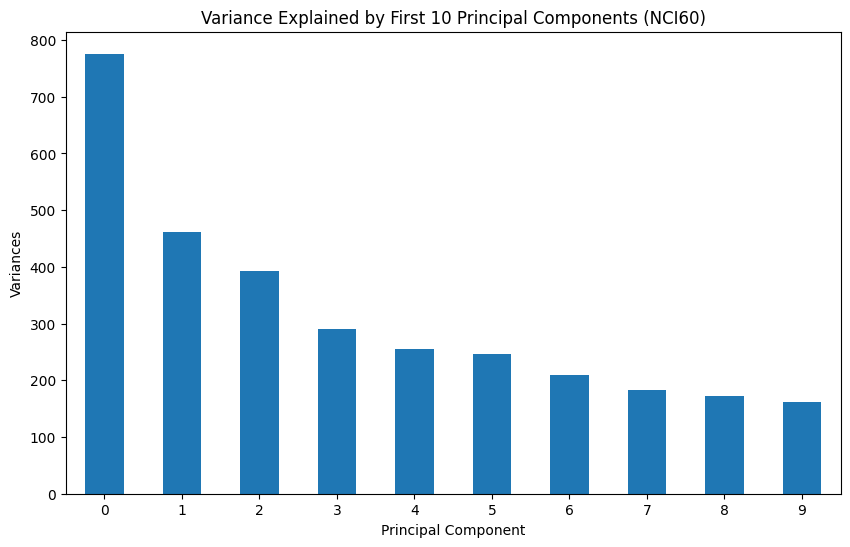

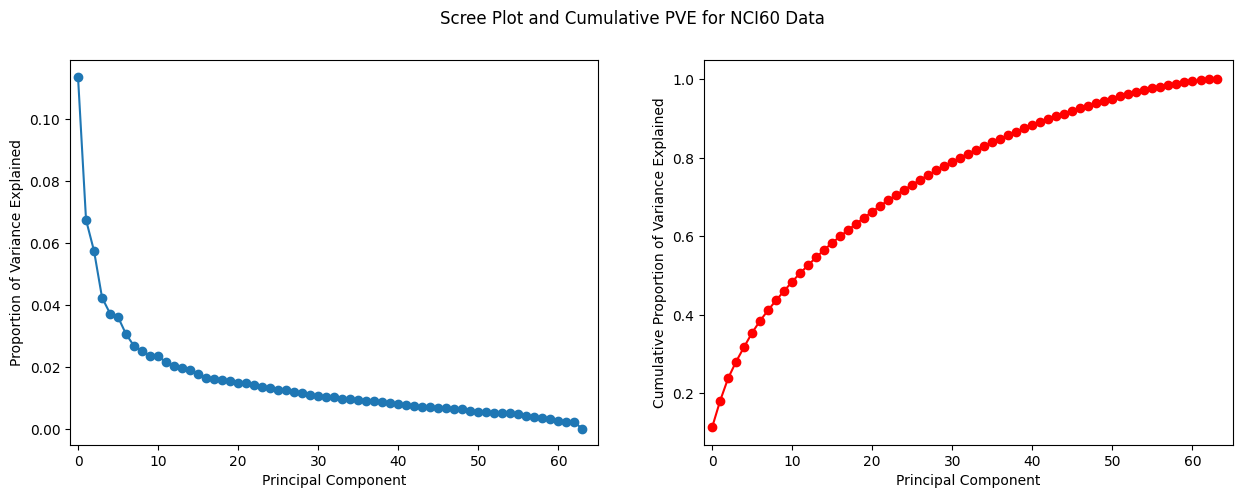

In [ ]:

# --- 10.6: NCI60 Data Example ---

print("\n--- NCI60 Data Analysis ---")

# Load the NCI60 dataset
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
print("\nInfo about NCI60 data columns:")
df2.info()

#wczytywanie kolumny 1 jako etykiety
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
print("\nFirst 5 rows of NCI60 labels:")
print(y.head())

# Scale the data
X = pd.DataFrame(scale(df2))
print(f"\nShape of scaled NCI60 data: {X.shape}")

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))
print("\nFirst 5 rows of NCI60 Principal Component Scores:")
print(df2_plot.head())

# Plot the first few principal component score vectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot (PC1 vs PC2)
ax1.scatter(df2_plot.iloc[:, 0], df2_plot.iloc[:, 1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot (PC1 vs PC3)
ax2.scatter(df2_plot.iloc[:, 0], df2_plot.iloc[:, 2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y)
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=len(labels[1]) - 1) # vmax adjusted for number of unique labels
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')
plt.suptitle('PCA of NCI60 Data: PC1 vs PC2 and PC1 vs PC3')
plt.show()

# Summary of PVE for first few principal components
summary_df = pd.DataFrame([df2_plot.iloc[:, :5].std(axis=0, ddof=0).values, # Use .values for newer pandas versions
                           pca2.explained_variance_ratio_[:5],
                           np.cumsum(pca2.explained_variance_ratio_[:5])],
                          index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
                          columns=[f'PC{i+1}' for i in range(5)])
print("\nSummary of first 5 Principal Components for NCI60 data:")
print(summary_df)

# Plot variance explained by the first few principal components (bar plot)
df2_plot.iloc[:, :10].var(axis=0, ddof=0).plot(kind='bar', rot=0, figsize=(10, 6))
plt.ylabel('Variances')
plt.xlabel('Principal Component')
plt.title('Variance Explained by First 10 Principal Components (NCI60)')
plt.show()

# Scree plot and cumulative PVE for NCI60
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left plot (Scree plot)
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.005) # Adjusted ymin for better visualization

# Right plot (Cumulative PVE)
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1, 65)
plt.suptitle('Scree Plot and Cumulative PVE for NCI60 Data')
plt.show()

wykres 1 
Grupowanie typów nowotworów: Główne składowe (PC1, PC2, PC3) rozdzielają linie komórkowe różnych typów nowotworów. Na obu wykresach widać, że linie komórkowe jednego typu (np. LEUKEMIA - niebieskie lub RENAL - pomarańczowe) mają tendencję do tworzenia wyraźnych, oddzielnych skupisk.
Linie komórkowe z tego samego typu nowotworu mają bardzo podobne wzorce ekspresji genów. PCA skutecznie ujawnia te ukryte struktury w wysokowymiarowych danych genetycznych.

wykres 2

Wykres jasno pokazuje, że pierwsza główna składowa (PC 0) wyjaśnia zdecydowanie najwięcej wariancji. Następnie wariancja wyjaśniana przez kolejne składowe systematycznie, choć mniej gwałtownie, maleje.


wykres 3 i 4
Przedstawia proporcję wariancji wyjaśnianej przez każdą kolejną główną składową

po prawej wykres przedstawia skumulowaną proporcję wariancji wyjaśnianej przez rosnącą liczbę głównych składowych.